# 🐍 Dataset: jobs in iran
<p>
Date: 11-10-2024<br>
author: amir mohammad arghavany
</p>

# ⭐ import packages

In [185]:
# base packages
import numpy as np
import pandas as pd
# EDA
from ydata_profiling import ProfileReport
# visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# train, test
from sklearn.model_selection import train_test_split
# analyse progress
from tqdm.auto import tqdm
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

# ⭐ CLEAN DATASET

In [2]:
df  = pd.read_csv('./Job.csv')
df.head(3)

company_size                      education        gender  \
0           30  ['کارشناسی| مالی و حسابداری']  ترجیحاً خانم   
1          125                            NaN       فقط آقا   
2        5000+                            NaN  تفاوتی ندارد   

                 salary                                           workdays  \
0                   NaN                          شنبه تا چهارشنبه 8 الی 16   
1  12 - 10 میلیون تومان  شنبه تا چهارشنبه 8 تا  17:33، پنجشنبه 8:30 تا ...   
2                   NaN                          شنبه تا چهارشنبه 7 الی 16   

                 language business_trip             industry  \
0  ['انگلیسی| متوسط ۵۰٪']             -  نفت، گاز و پتروشیمی   
1                     NaN             -       تولیدی / صنعتی   
2                     NaN             -             بانکداری   

                                               bonus         location  \
0                                                  -     تهران، فاطمی   
1                          پاداش  -بیمه درمان تکمیلی        رباط کریم   
2  وام  -پاداش  -بیمه درمان تکمیلی  -تسهیلات تفری...  تهران، آرژانتین   

                ad_name                                          softwares  \
0      کارشناس حسابداری  ['Microsoft Word| متوسط', 'Microsoft Excel| مت...   
1      کارگر ساده - آقا                                                NaN   
2  کارشناس موشن گرافیست  ['Adobe Photoshop| پیشرفته', 'Adobe Illustrato...   

                                military_services experience        date  \
0                                             NaN        NaN  1402-03-23   
1  اتمام خدمت سربازی و یا معافیت از آن الزامی است        NaN  1402-02-26   
2  اتمام خدمت سربازی و یا معافیت از آن الزامی است        NaN  1402-02-11   

   min_age  max_age  
0     23.0     33.0  
1     23.0     45.0  
2      NaN     35.0

In [3]:
# ProfileReport(df)

In [4]:
print('='*55, '[check] categorical data & type')
print(df.info())

print('='*55, ['check null data'])
print(df.isna().sum())

print('='*55, 'unique values of every column')
print(df.nunique())

# print('='*55, '[check] imbalenced data')
# for i in df.columns:
#     print('-'*45, i)
#     print(df[i].value_counts())

print('='*55, '[check] scaling')
print(df.describe())

======================================================= [check] categorical data & type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_size       34101 non-null  object 
 1   education          17660 non-null  object 
 2   gender             33498 non-null  object 
 3   salary             9390 non-null   object 
 4   workdays           33495 non-null  object 
 5   language           14214 non-null  object 
 6   business_trip      33494 non-null  object 
 7   industry           33498 non-null  object 
 8   bonus              33498 non-null  object 
 9   location           33498 non-null  object 
 10  ad_name            33498 non-null  object 
 11  softwares          18641 non-null  object 
 12  military_services  10687 non-null  object 
 13  experience         13 non-null     object 
 14  date               34101 non-n

# - 🍀 company-size

In [5]:
df.replace({
    'company_size': {
        '30': 30,
        '125': 125,
        '350': 350,
        '<10': 10,
        '750': 750,
        '3000': 3000,
        '5000+': 3000,
        'Unknown': np.NaN
    }
}, inplace=True)

# - 🍀 education

In [6]:
i = 0
df_education = pd.DataFrame()
for e in tqdm(df.education):
    if type(e) == str:
        edu = e[1:-1].replace("'", '').split(',')
        for ed in edu:
            ed = ed.split('/')[0]
            if ed not in df_education.columns:
                df_education[ed] = np.zeros(shape=(df.education.shape)).astype('int32')
            df_education[ed][i] = 1
    i+=1

  0%|          | 0/34101 [00:00<?, ?it/s]

In [7]:
a = []
for i in df_education.columns:
    num = np.sum(df_education[i])
    if num > 100:
        a.append(i)
df_education = df_education[a]

# - 🍀 military services

In [8]:
df.replace({
    'military_services': {
        np.NaN: 0,
        'اتمام خدمت سربازی و یا معافیت از آن الزامی است': 1,
        'Military service must be done': 1
    }
}, inplace=True)

# - 🍀 gender

In [9]:
df.replace({
    'gender': {
        'ترجیحاً خانم': 'woman',
        'فقط آقا': 'man',
        'تفاوتی ندارد': 'not-matter',
        'ترجیحاً آقا': 'man',
       'فقط خانم': 'woman',
        'Men / Women': 'not-matter',
        np.NaN: 'not-matter',
        'Only Women': 'woman',
        'Only Men': 'man',
       'Preferred Women': 'woman',
        'Preferred Men': 'man',
    }
}, inplace=True)

In [10]:
gender = pd.get_dummies(df.gender)

# - 🍀 salary

In [11]:
df.replace({
    'salary': {
        '12 - 10 میلیون تومان': '10-12',
        '20 - 15 میلیون تومان': '15-20',
        '35 - 25 ميليون تومان': '25-35',
        '10 - 8 میلیون تومان': '8-10',
        '15 - 12 میلیون تومان': '12-15',
        '45 - 35 ميليون تومان': '35-45',
        '8 - 6 میلیون تومان': '6-8',
        '4 - 3 میلیون تومان': '3-4',
        '25 - 20 میلیون تومان': '20-25',
        '8 - 10 Million Tomans': '8-10',
        'Above 60 Million Tomans': '60',
        '60 میلیون تومان به بالا': '60',
        '5 - 4 میلیون تومان': '4-5',
        '15 - 20 Million Tomans': '15-20',
        '5 - 6 Million Tomans': '5-6',
        '60 - 45 میلیون تومان': '45-60',
        '35 - 45 Million Tomans': '35-45',
        '20 - 25 Million Tomans': '20-25',
        '25 - 35 Million Tomans': '25-35',
        '10 - 12 Million Tomans': '10-12',
        '6 - 5 میلیون تومان': '5-6',
        '12 - 15 Million Tomans': '12-15',
        '45 - 60 Million Tomans': '45-60',
        '6 - 8 Million Tomans': '6-8',
    
    }
}, inplace=True)

In [12]:
df[['salary-min', 'salary-max']] = df.salary.str.split('-', expand=True)

In [13]:
for s in ['salary-min', 'salary-max']:
    df[s] = df[s][df[s].notna()].astype('int32')

In [14]:
df.drop('salary', inplace=True, axis=1)

# - 🍀 industry

In [15]:
industry = pd.get_dummies(df.industry)

# - 🍀 location

In [16]:
df.location = df.location.str.split('،', expand=True)[0]

In [17]:
loc = pd.DataFrame(df.location.value_counts())

In [18]:
location = pd.get_dummies(df.location)

In [19]:
location = location[loc[loc.location > 150].index]

In [20]:
df.drop('location', inplace=True, axis=1)

# - 🍀 ad_name

In [21]:
ad = pd.DataFrame(df.ad_name.value_counts())

In [22]:
ad_name = pd.get_dummies(df.ad_name)

In [23]:
ad_name = ad_name[ad[ad.ad_name > 100].index]

# - 🍀 softwares

In [24]:
i = 0
df_softwares = pd.DataFrame()
for e in tqdm(df.softwares):
    if type(e) == str:
        edu = e[1:-1].replace("'", '').split(',')
        for ed in edu:
            ed = ed.split('/')[0]
            if ed not in df_softwares.columns:
                df_softwares[ed] = np.zeros(shape=(df.softwares.shape)).astype('int32')
            df_softwares[ed][i] = 1
    i+=1

  0%|          | 0/34101 [00:00<?, ?it/s]

In [25]:
a = []
for i in df_softwares.columns:
    num = np.sum(df_softwares[i])
    if num > 100:
        a.append(i)
df_softwares = df_softwares[a]

# - 🍀 drop unusefull columns

In [26]:
df.drop(['experience', 'education', 'gender', 'workdays', 'language', 'business_trip', 'industry', 'bonus', 'ad_name', 'softwares', 'date'], inplace=True, axis=1)

# - splited dataset

In [27]:
print('education:', df_education.shape)
print('gender:', gender.shape)
print('industry:', industry.shape)
print('location:', location.shape)
print('ad_name:', ad_name.shape)
print('df_softwares:', df_softwares.shape)
print('df_main', df.shape)

education: (34101, 64)
gender: (34101, 3)
industry: (34101, 76)
location: (34101, 19)
ad_name: (34101, 34)
df_softwares: (34101, 64)
df_main (34101, 6)


In [177]:
dff = pd.concat([df, df_education, gender, industry, location, ad_name, df_softwares], axis=1)

In [178]:
# dff.sample(5)

In [179]:
# dff.to_csv('cleaned-database.csv', encoding='utf-8-sig')

# ⭐ EDA

# --- most ongoing job

In [180]:
# witch education has most ongoing job
def most_ongoing(dataframe, number=3):
    name = []
    value = []
    for c in dataframe.columns:
        name.append(c)
        value.append(np.sum(dataframe[c]))
    return pd.DataFrame(data=value, columns=['value'], index=name).sort_values('value', ascending=False).head(number)

In [98]:
most_ongoing(df_education, 14)

value
کارشناسی| مالی و حسابداری    3416
کارشناسی| مدیریت             2792
کارشناسی| کامپیوتر           1820
کارشناسی| مهندسی صنایع       1496
 کارشناسی| مهندسی صنایع      1229
کارشناسی| مهندسی مکانیک      1092
 کارشناسی| مدیریت             965
کارشناسی| مهندسی برق          779
 کارشناسی| کامپیوتر           668
 کارشناسی| مهندسی مکانیک      590
 کارشناسی| مهندسی برق         577
 کارشناسی| مالی و حسابداری    488
 کارشناسی| اقتصاد             394
کارشناسی| مهندسی عمران        384

In [79]:
# witch gender has most ongoing job
most_ongoing(gender)

value
not-matter  19095
man          8526
woman        6480

In [97]:
# witch industry has most ongoing job
most_ongoing(industry)

value
تولیدی / صنعتی                           6917
فناوری اطلاعات / نرم افزار و سخت افزار   2907
تجارت / بازرگانی                         2364

In [86]:
# witch location has most ongoing job
most_ongoing(location, 5)

value
تهران   19400
اصفهان   1128
کرج      1053
مشهد      922
شیراز     405

In [95]:
# witch ad_name has most ongoing job
most_ongoing(ad_name, 4)

value
کارشناس فروش         702
کارشناس حسابداری     640
حسابدار              612
کارآموز طراح سایت    508

In [93]:
# witch gender has most ongoing job
most_ongoing(df_softwares)

value
 Microsoft Excel| متوسط   7471
Microsoft Word| متوسط     5547
 Microsoft Word| متوسط    4040

In [110]:
df.describe()

company_size  military_services   min_age   max_age  salary-min  \
count     33498.000          34101.000 20993.000 22616.000    9390.000   
mean        481.008              0.313    23.871    37.959      12.400   
std         899.951              0.464     3.799     5.244       5.498   
min          10.000              0.000    18.000    18.000       3.000   
25%          30.000              0.000    21.000    35.000      10.000   
50%         125.000              0.000    24.000    37.000      12.000   
75%         350.000              1.000    25.000    40.000      15.000   
max        3000.000              1.000    50.000    50.000      60.000   

       salary-max  
count    9365.000  
mean       15.603  
std         6.747  
min         4.000  
25%        12.000  
50%        15.000  
75%        20.000  
max        60.000

# --- most salary

In [138]:
def most_salary(full_df, specified_df):
    name, value = [], []
    for c in specified_df.columns:
        value.append(np.mean(dff[dff[c]==1][['salary-min', 'salary-max']]))
        name.append(c)
    return pd.DataFrame(data=value, index=name, columns=['salary-min', 'salary-max']).sort_values('salary-min', ascending=False)

In [139]:
# by gender
most_salary(dff, gender)

salary-min  salary-max
not-matter      12.942      16.224
man             12.825      16.299
woman           10.548      13.257

In [145]:
# by education
most_salary(dff, df_education).head(6)

salary-min  salary-max
 کارشناسی ارشد| مدیریت              22.824      29.647
 کاردانی| معماری و شهرسازی          21.500      27.500
کارشناسی ارشد| مدیریت               19.821      22.925
کارشناسی ارشد| مالی و حسابداری      19.658      25.789
 کارشناسی ارشد| مهندسی صنایع        19.538      25.538
Bachelor| Computer and IT           18.750      24.583

In [148]:
# by industry
most_salary(dff, industry).head(5)

salary-min  salary-max
Marketing / Advertising         25.000      31.667
املاک و مستغلات                 23.333      23.431
Manufacturing & Production      22.400      16.250
Finance / Investment            21.250      26.750
IT / Software / Hardware        20.667      27.333

In [155]:
# by ad_name
most_salary(dff, ad_name).head(5)

salary-min  salary-max
حسابدار ارشد                   15.478      20.217
بازاریاب                       14.360      16.083
اعطای نمایندگی بیمه سامان      14.000      18.375
بازاریاب و ویزیتور             13.895      18.158
کارشناس بازرگانی خارجی         13.586      17.448

# ⭐ PREPROCCESSING

# --- null values

In [181]:
# null values
imputer = SimpleImputer()
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns).astype('float32')

# --- outliers

  0%|          | 0/6 [00:00<?, ?it/s]

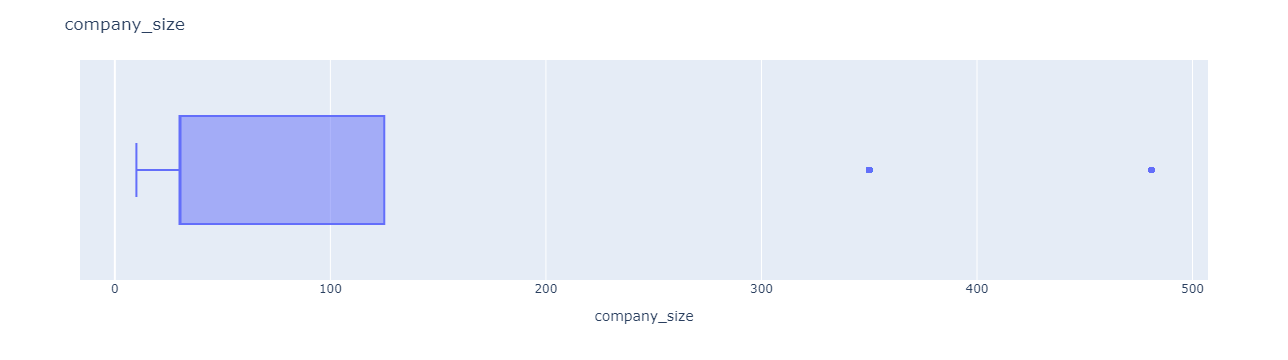

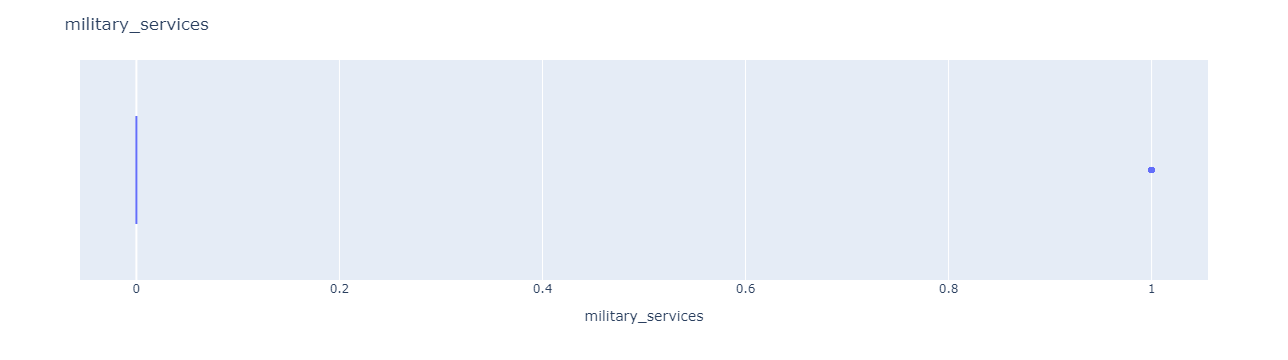

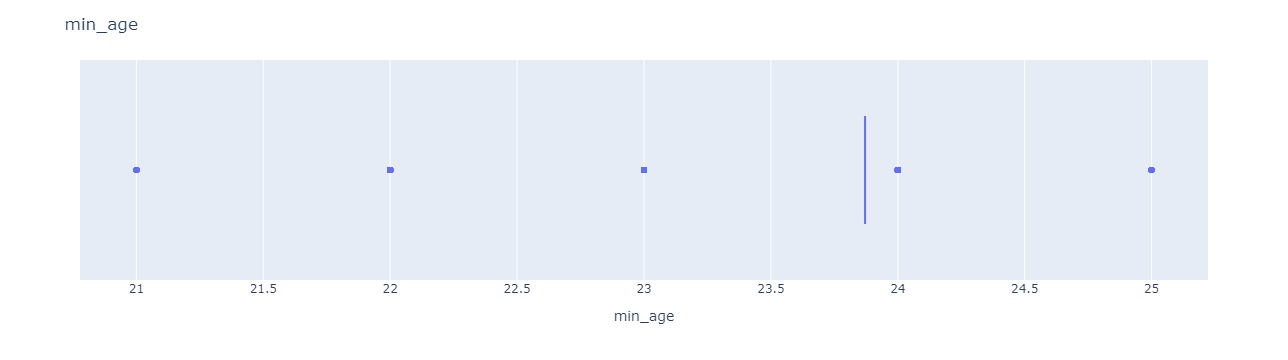

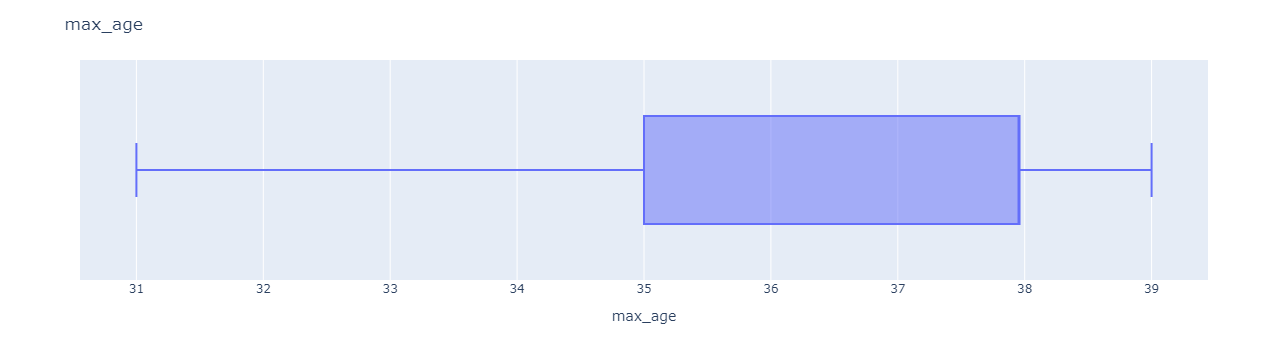

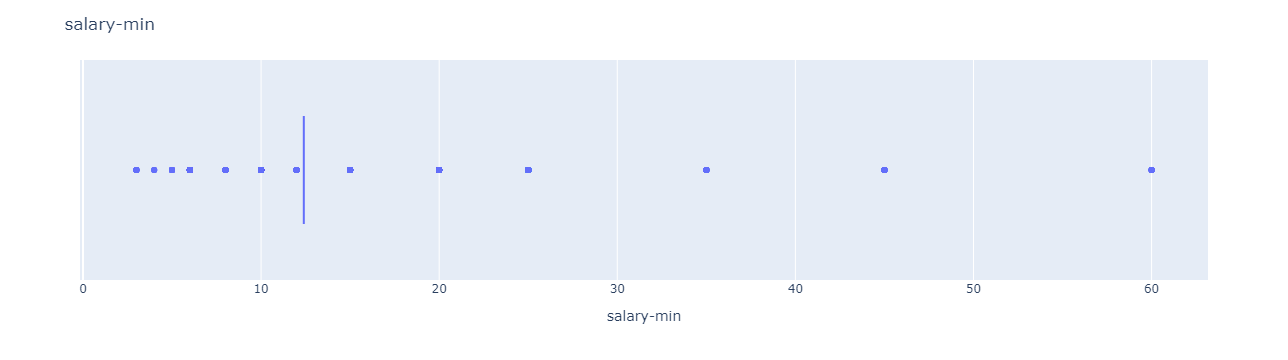

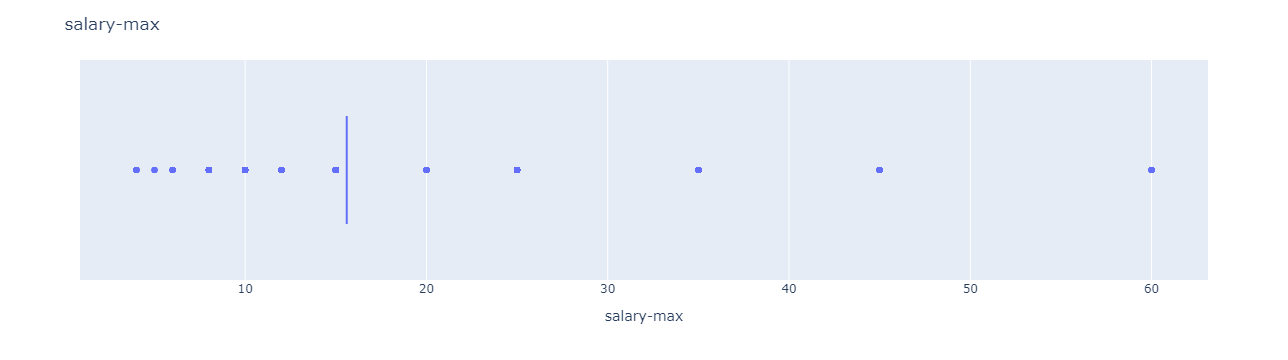

In [184]:
# detect outliers
for c in tqdm(df.columns):
    p = px.box(x=c, data_frame=dff)
    p.update_layout(height=350, width=900, title_text=c)
    p.show()

  0%|          | 0/3 [00:00<?, ?it/s]

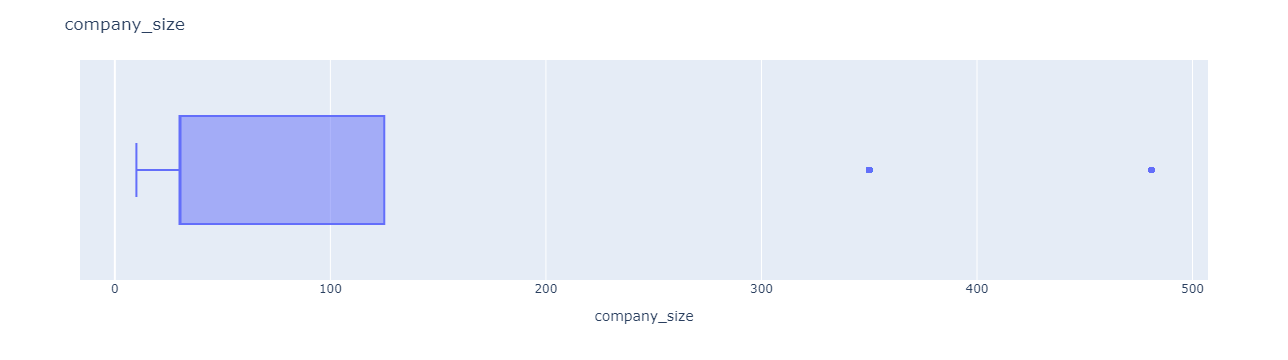

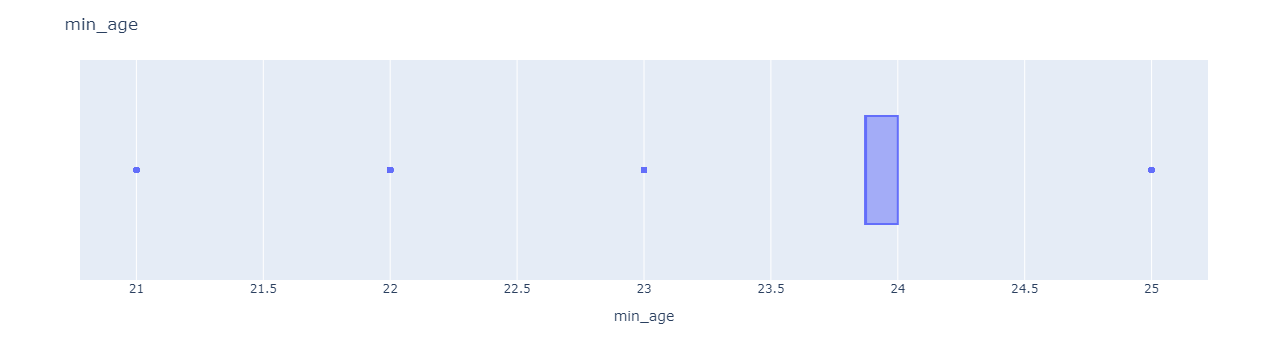

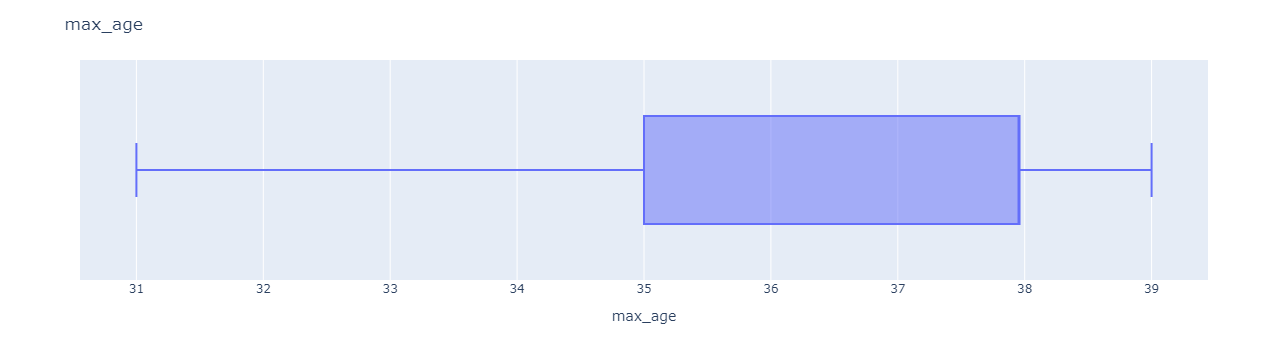

In [183]:
# remove outliers -> 3 standard deviation
for c in tqdm(['company_size', 'min_age', 'max_age']):
    Q1 = dff[c].quantile(0.25)
    Q3 = dff[c].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q1 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    dff = dff[
        (dff[c]>lower_limit) & (dff[c]<upper_limit)
    ]
    p = px.box(x=c, data_frame=dff)
    p.update_layout(height=350, width=900, title_text=c)
    p.show()

# ⭐ SPLIT TRAIN, TEST

In [194]:
X = dff.drop(['salary-min', 'salary-max'], axis=1)
Y = dff['salary-min']

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3, stratify=Y)

# ⭐ SCALING

In [198]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

In [199]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)